
.. redirect-from:: /tutorials/introductory/pyplot


# Pyplot tutorial

pyplot 接口简介。 另请参阅
“quick_start”概述了 Matplotlib
works 和“api_interfaces”来解释
支持的用户 API。


## pyplot 简介

：mod：'matplotlib.pyplot' 是使 matplotlib
像 MATLAB 一样工作。 每个 ''pyplot'' 函数都会对图中进行一些更改：
例如，创建一个图形，在图形中创建一个绘图区域，绘制一些线条
在绘图区域中，用标签等装饰绘图。

在 ：mod：'matplotlib.pyplot' 中，保留了各种状态
跨函数调用，以便它跟踪诸如
当前图和绘图区域，以及绘图
函数被定向到当前的轴（请注意，我们使用大写
轴来引用 '~.axes.Axes的概念，这是一个核心
“人物的一部分<figure_parts>”
而不仅仅是 *axis* 的复数形式）。

<div class=“alert alert-info”<h4>>注意</h4><p>隐式 pyplot API 通常不那么详细，但也不如
   显式 API。 您在此处看到的大多数函数调用也可以调用
   作为“Axes”对象中的方法。我们建议浏览教程
   和示例，看看这是如何工作的。参见“api_interfaces”的
   对受支持的用户 API 的权衡说明。</p></div>

使用 pyplot 生成可视化非常快：

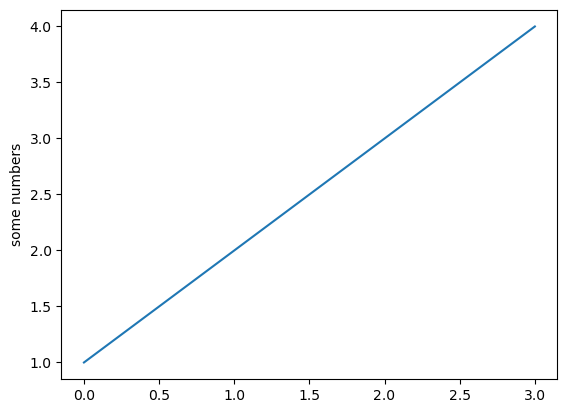

In [1]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

您可能想知道为什么 x 轴的范围为 0-3，而 y 轴的范围为
从 1-4。 如果提供单个列表或数组
'~.pyplot.plot'，matplotlib 假设它是一个
序列，并自动生成 x 值
你。 由于 python 范围以 0 开头，因此默认的 x 向量具有
长度与 y 相同，但以 0 开头;因此，x 数据是
''[0, 1, 2, 3]''.

'~.pyplot.plot' 是一个通用函数，需要任意数量的
参数。 例如，要绘制 x 与 y 的关系，您可以编写：

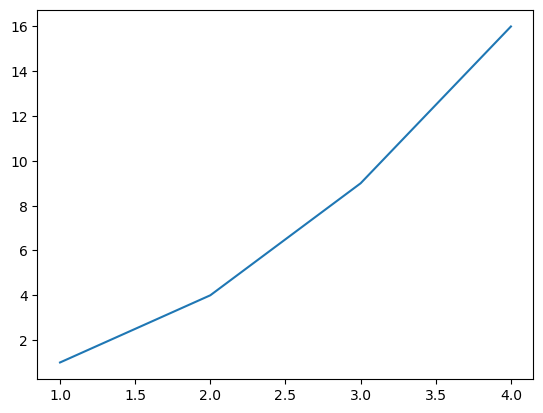

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

### 格式化绘图的样式

对于每对 x、y 参数，都有一个可选的第三个参数
这是指示颜色和线条类型的格式字符串
剧情。 格式字符串的字母和符号来自
MATLAB，然后将颜色字符串与线型字符串连接起来。
默认格式字符串为“b-”，这是一条蓝色实线。 为
例如，要用红色圆圈绘制上述内容，您将发出

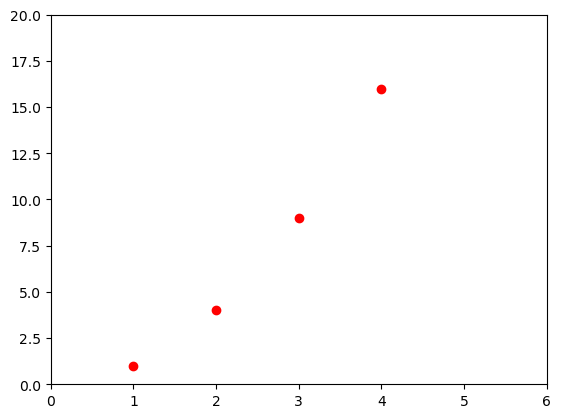

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis((0, 6, 0, 20))
plt.show()

请参阅“~.pyplot.plot”文档以获取完整的
线型和格式字符串的列表。 这
上面示例中的“~.pyplot.axis”函数采用
''[xmin， xmax， ymin， ymax]'' 的列表，并指定
轴。

如果 matplotlib 仅限于处理列表，那将是公平的
对数值处理无用。 通常，您将使用 [numpy]（https://numpy.org/） 数组。 事实上，所有序列都是
在内部转换为 numpy 数组。 下面的例子说明了
在一次函数调用中绘制具有不同格式样式的多行
使用数组。

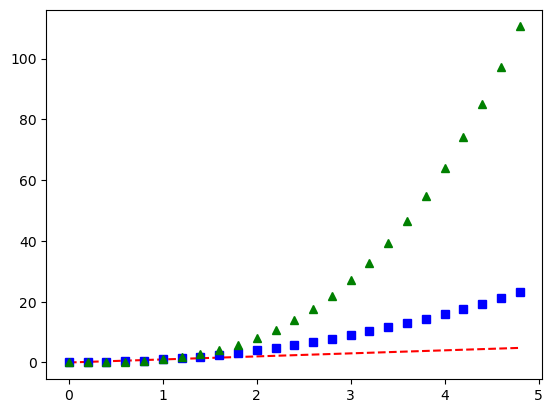

In [4]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## 使用关键字字符串绘制

在某些情况下，您的数据格式可以让您
使用字符串访问特定变量。例如，使用“结构化数组”_
或“熊猫”。DataFrame'。

Matplotlib 允许您为这样的对象提供
''data'' 关键字参数。如果提供，那么您可以生成带有
与这些变量对应的字符串。

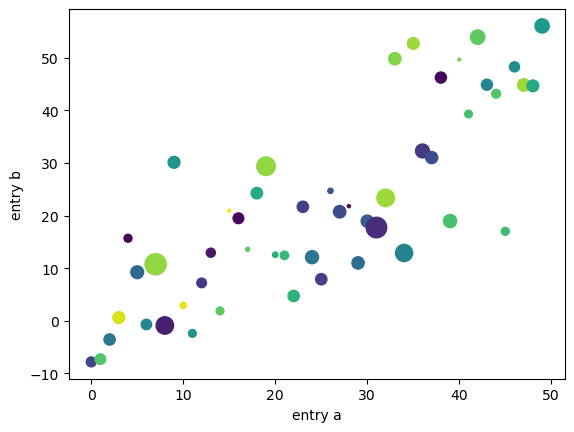

In [5]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## 使用分类变量绘图

也可以使用分类变量创建绘图。
Matplotlib 允许您将分类变量直接传递给
许多绘图功能。例如：

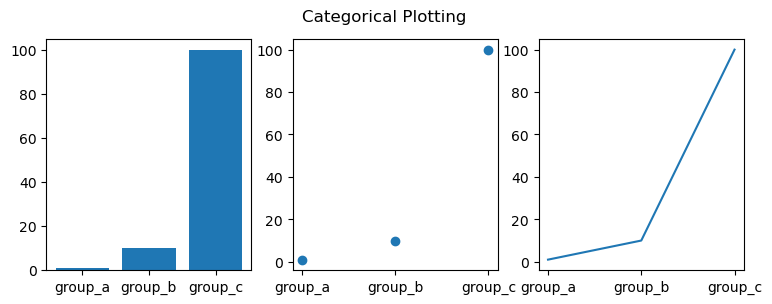

In [6]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## 控制线属性

线条有许多可以设置的属性：线宽、短划线样式、
抗锯齿等;请参阅“matplotlib.lines.Line2D”。 有
设置线属性的几种方法

* 使用关键字参数：：

plt.plot（x， y， 线宽=2.0）

* 使用“Line2D”实例的 setter 方法。 ''plot'' 返回一个列表
  ''Line2D'' 对象;例如，''line1， line2 = plot（x1， y1， x2， y2）''。 在代码中
  下面我们假设我们只有
  一行，使返回的列表长度为 1。 我们使用 tuple 解包
  ''line'，获取该列表的第一个元素：：

线， = plt.plot（x， y， '-'）
      line.set_antialiased（False） # 关闭抗锯齿

* 使用 '~.pyplot.setp'。 下面的例子
  使用 MATLAB 样式的函数设置多个属性
  在行列表中。 ''setp'' 透明地处理对象列表
  或单个对象。 您可以使用 python 关键字参数或
  MATLAB风格的字符串/值对：：

线 = plt.plot（x1， y1， x2， y2）
      # 使用关键字参数
      plt.setp（lines， color='r'， linewidth=2.0）
      # 或 MATLAB 样式字符串值对
      plt.setp（lines， 'color'， 'r'， 'linewidth'， 2.0）

以下是可用的 '~.lines.Line2D' 属性。

======================  ==================================================
属性值类型
======================  ==================================================
阿尔法浮点
动画 [True |错误]
抗锯齿或 aa [True |错误]
clip_box matplotlib.transform.Bbox 实例
clip_on [真 |错误]
clip_path Path 实例和 Transform 实例、Patch
color 或 c 任何 matplotlib 颜色
包含命中测试功能
dash_capstyle [''''butt''' | '''round''' | '''projecting''']
dash_joinstyle ['''斜接''' | '''圆形''' | '''斜角''']
破折号 开/关墨水的顺序（以磅为单位）
数据 （np.array xdata， np.array ydata）
图 matplotlib.figure.Figure 实例
标记任何字符串
linestyle 或 ls [ '''-''' | '''--''' | '''-.''' |''':''' |'''步骤''' |...]
线宽或 LW 浮点值（以磅为单位）
标记 [ '''+''' | '''，''' | '''.''' |'''1''' |'''2''' |'''3''' |'''4''' ]
markeredgecolor 或 mec 任何 matplotlib 颜色
MarkerEdgeWidth 或 MEW 浮点值（以磅为单位）
markerfacecolor 或 mfc 任何 matplotlib 颜色
标记大小或 MS 浮点数
markevery [ 无 | 整数 |（开始，大步）]
交互式线路选择中使用的选择器
pickradius 线拾取选择半径
solid_capstyle [''''屁股''' | '''圆形''' | '''投影''']
solid_joinstyle ['''斜接''' | '''圆形''' | '''斜角''']
transform 一个 matplotlib.transforms.Transform 实例
可见 [True |错误]
xdata np.array
ydata np.array
zorder 任意数字
======================  ==================================================

要获取可设置行属性的列表，请调用
'~.pyplot.setp' 函数，其中有一行或多行作为参数

..源代码：： ipython

在 [69] 中： lines = plt.plot（[1， 2， 3]）

在 [70] 中：plt.setp（lines）
      alpha：浮点
      动画：[真 |错误]
      抗锯齿或 aa：[True |错误]
      ...剪 断

## 使用多个图形和轴

MATLAB 和 ：mod：'.pyplot' 具有当前图形的概念
和当前的轴。 所有绘图功能都适用于当前
轴。 函数 '~.pyplot.gca' 返回当前 Axes （a
'matplotlib.axes.Axes' 实例），而 '~.pyplot.gcf' 返回当前
figure（'matplotlib.figure.Figure' 实例）。通常，您不必这样做
担心这个，因为这一切都在幕后处理。 下面
是用于创建两个子图的脚本。

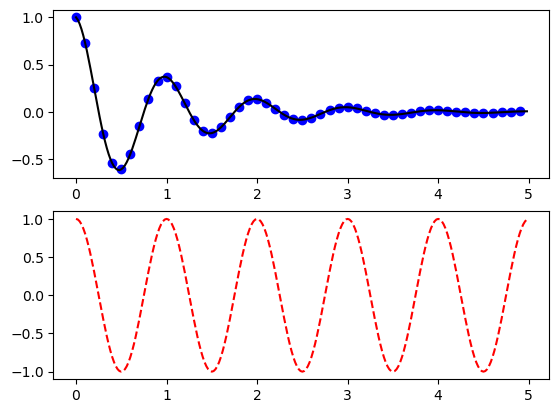

In [7]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

此处的“~.pyplot.figure”调用是可选的，因为将创建一个图形
如果不存在，就像将创建一个 Axes 一样（相当于显式
''subplot（）'' 调用），如果不存在。
'~.pyplot.subplot' 调用指定 ''numrows，
numcols， plot_number''，其中 ''plot_number'' 的范围从 1 到
''numrows*numcols''。 ''subplot'' 调用中的逗号是
可选 if ''numrows*numcols<10''。 所以 ''subplot（211）'' 是相同的
到 ''subplot（2， 1， 1）''。

您可以创建任意数量的子图
和轴。 如果要手动放置 Axes，即不在
矩形网格，使用 '~.pyplot.axes'，
它允许您将位置指定为 ''axes（[left， bottom，
width， height]）''，其中所有值均为小数（0 到 1）
坐标。 有关以下示例，请参阅 :d oc：'/gallery/subplots_axes_and_figures/axes_demo'
手动放置 Axes 和 :d oc：'/gallery/subplots_axes_and_figures/subplot' 用于
具有大量子图的示例。

您可以使用多个
'~.pyplot.figure' 调用一个递增的数字
数。 当然，每个图形可以包含尽可能多的轴和子图
如你所愿：

将 matplotlib.pyplot 导入为 plt
    plt.figure（1） # 第一个图
    plt.subplot（211） # 第一个图中的第一个子图
    plt.plot（[1， 2， 3]）
    plt.subplot（212） # 图中的第二个子图
    plt.plot（[4， 5， 6]）

plt.figure（2） # 第二个数字
    plt.plot（[4， 5， 6]） # 默认创建一个 subplot（）

plt.figure（1） # 第一个数字 current;
                                 # subplot（212） 仍然有效
    plt.subplot（211） # 在第一个图中制作 subplot（211）
                                 # 当前
    plt.title（'Easy as 1， 2， 3'） # 子剧情 211 标题

您可以使用“~.pyplot.clf”清除当前图形
以及带有 '~.pyplot.cla' 的当前 Axes。 如果发现
烦人的状态（特别是当前图像、图形和轴）
正在幕后为你维护，不要绝望：这只是一个薄薄的
围绕面向对象的 API 的有状态包装器，您可以使用
相反（参见'artists_tutorial'）

如果你要制作很多数字，你需要注意一个
更多的事情：图形所需的内存不完全
释放，直到图形显式关闭
'~.pyplot.close'。 删除对
图，和/或使用窗口管理器来终止其中的窗口
图形出现在屏幕上，是不够的，因为pyplot
维护内部引用，直到 '~.pyplot.close'
被调用。

## 处理文本

'~.pyplot.text' 可用于在任意位置添加文本，并且
'~.pyplot.xlabel'， '~.pyplot.ylabel' 和 '~.pyplot.title' 用于添加
指定位置的文本（参见“text_intro”
更详细的例子）

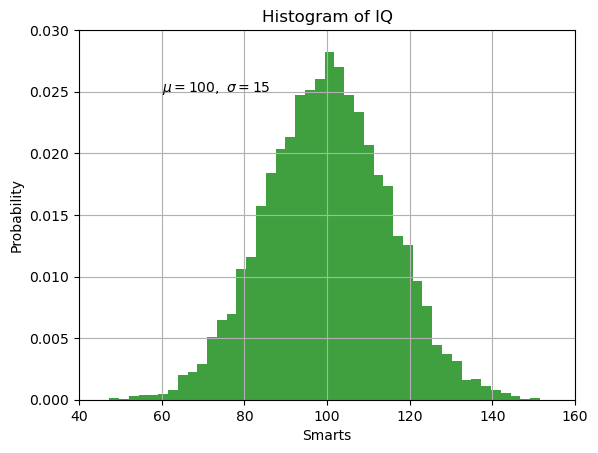

In [8]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

所有 '~.pyplot.text' 函数都返回一个 'matplotlib.text.Text'
实例。 与上面的行一样，您可以通过以下方式自定义属性
将关键字参数传递到文本函数中或使用 '~.pyplot.setp'：：

t = plt.xlabel（'我的数据'， fontsize=14， color='红色'）

这些属性在“text_props”中有更详细的介绍。

### 在文本中使用数学表达式

Matplotlib 接受任何文本表达式中的 TeX 公式表达式。
例如，在标题中写出表达式 $\sigma_i=15$，
你可以写一个用美元符号包围的 TeX 表达式：：

plt.title（r'$\sigma_i=15$'）

标题字符串前面的“r”很重要——它表示
字符串是 *原始* 字符串，而不是将反斜杠视为
蟒蛇逃脱。 matplotlib 有一个内置的 TeX 表达式解析器和
布局引擎，并附带自己的数学字体 -- 有关详细信息，请参阅
'数学文本'。 因此，您可以在
平台，无需安装 TeX。 对于那些拥有LaTeX的人
和 dvipng 安装，您还可以使用 LaTeX 来格式化您的文本和
将输出直接合并到您的显示图形中或保存
PostScript -- 参见 'UseTex'。

### 注释文本

上面基本“~.pyplot.text”函数的用途
将文本放置在轴上的任意位置。 常见用途
text 是用来注释情节的某些特征，而
'~.pyplot.annotate' 方法提供帮助
使注释变得容易的功能。 在注释中，有
需要考虑的两点：被注释的位置由
参数 ''xy'' 和文本 ''xytext'' 的位置。 两者兼而有之
这些参数是 ''（x， y）'' 元组。

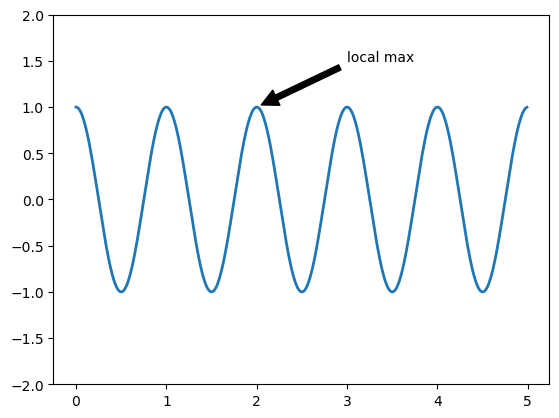

In [9]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

在此基本示例中，“xy”（箭头提示）和“xytext”
位置（文本位置）位于数据坐标中。 有一个
可以选择的各种其他坐标系 -- 参见
'annotations-tutorial' 和 'plotting-guide-annotation' 用于
详。 更多例子可以在
:d oc：'/gallery/text_labels_and_annotations/annotation_demo'。

## 对数轴和其他非线性轴

：mod：'matplotlib.pyplot' 不仅支持线性轴刻度，还支持
对数和 Logit 刻度。如果数据跨越多个订单，则通常使用此方法
量级。更改轴的刻度很简单：：

plt.xscale（'日志'）

具有相同数据和 y 轴不同比例的四个图的示例
如下图所示。

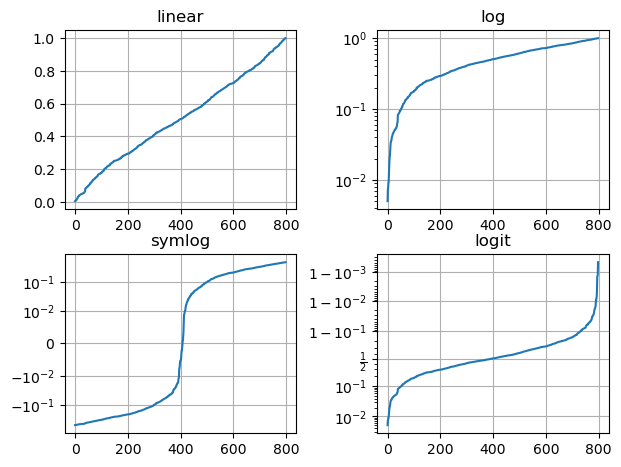

In [10]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

也可以添加自己的比例，参见“matplotlib.scale”以获取
详。